In [30]:
# 1. Import necessary libraries

import numpy as np  # Import numpy for numerical computations, particularly array operations.
import pandas as pd  # Import pandas for data manipulation and analysis.

import matplotlib.pyplot as plt  # Import matplotlib for creating plots and visualizing data.

from sklearn.datasets import make_moons  # Import make_moons to generate a toy dataset with a moon shape.
from sklearn.model_selection import train_test_split  # Import train_test_split to divide data into training and testing sets.

from tensorflow.keras.models import Sequential  # Import Sequential to define the model in a step-by-step manner, where layers are stacked in sequence.
from tensorflow.keras.layers import Dense  # Import Dense to define fully connected layers in the neural network.
from tensorflow.keras.optimizers import SGD  # Import SGD to use the Stochastic Gradient Descent optimizer.

# tensorflow and pytorch for ANN

In [31]:

# 2. Dataset Generation

X, y = make_moons(n_samples=2000, noise=0.2, random_state=42)  # Generate a dataset with 2000 samples in the shape of two moons, add noise, and set random seed for reproducibility.

# X: Represents the feature set (input data points), where each point is a 2D coordinate.
# y: Represents the labels (output), where each point is assigned either class 0 or class 1, corresponding to the two moons.
# n_samples=2000: Specifies that we want 2000 data points in the dataset.
# noise=0.2: Introduces some random noise to the dataset to make the problem a bit more challenging.
# random_state=42: Ensures the dataset generation is reproducible (the same every time the code runs with this value).


In [32]:
# 3. Data Inspection

print(X.shape)  # Print the shape of the input feature array X.
print(np.unique(y))  # Print the unique class labels in the target array y.

# X.shape: Shows the dimensions of the feature set. For example, (2000, 2) means 2000 samples with 2 features each.
# np.unique(y): Returns the unique class labels in y (e.g., [0 1]), indicating it's a binary classification problem.


(2000, 2)
[0 1]


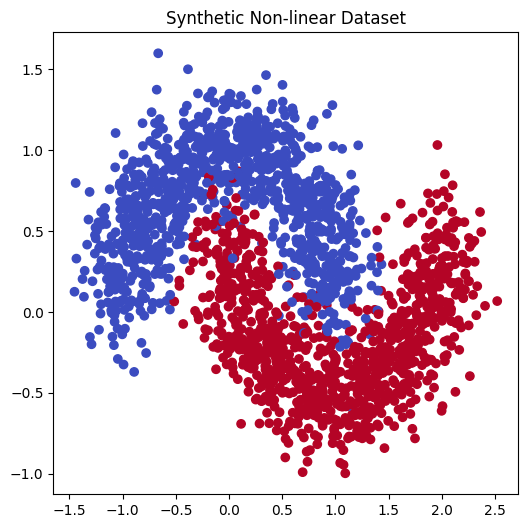

In [33]:
# 4. Visualize Dataset

plt.figure(figsize=(6, 6))  # Create a new figure with a specified size of 6x6 inches.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)  # Create a scatter plot of the dataset, coloring points by their class labels.
plt.title("Synthetic Non-linear Dataset")  # Add a title to the plot.
plt.show()  # Display the plot.

# plt.figure(figsize=(6, 6)): Sets the size of the plot window. Helps make the plot clearer and more readable.
# X[:, 0] and X[:, 1]: These are the x and y coordinates of the data points (since X has 2 features per sample).
# c=y: Colors each point according to its class (0 or 1).
# cmap=plt.cm.coolwarm: Uses a colormap to visually distinguish classes (blue vs red).
# plt.title(...): Adds a title so viewers understand what the plot represents.
# plt.show(): Renders the plot in the output.



# 0. Data Cleaning (Not Required for Synthetic Dataset)
 Note: Since `make_moons` generates a clean, synthetic dataset, we skip data cleaning here.
 However, in real-world datasets, the following steps are essential:

### 1 - Missing Values
Use pandas to check and handle missing values:  
- `pd.isna()` or `DataFrame.isnull()` can be used to find missing entries.  
- `DataFrame.fillna()` is used to fill missing values with a default or calculated value (like mean or median).  
- Example: `df.fillna(method='ffill')` — forward fill missing values.

### 2 - Duplicate Data
Check and remove duplicate rows using pandas:  
- `df.duplicated()` returns True for duplicated rows.  
- `df.drop_duplicates()` removes them.  
- Example: `df = df.drop_duplicates()` — removes duplicate rows.

### 3 - Find Outliers (Using Box Plot)
Use matplotlib or seaborn to visualize and detect outliers in numerical features:  
- Example: `plt.boxplot(df['feature_name'])` — visualizes outliers for a specific feature.

### 4 - EDA Visualization (Exploratory Data Analysis)
Helps understand the distribution and relationships in data:  
- Univariate: Visualize individual features (e.g., histograms, bar plots).  
- Bivariate: Compare two features (e.g., scatter plots, bar charts).  
- Multivariate: Analyze multiple features together (e.g., pair plots, correlation heatmaps).

### 5 - Feature Selection / Engineering (Encoding & Transformation)
- Convert categorical features to numerical using encoding techniques:  
  - Label Encoding: for ordinal data  
  - One-Hot Encoding: for nominal data  
- Change data types (e.g., from object to float or int).  
- Combine multiple features into one (e.g., date + time → datetime).  
- Split complex features into simpler ones (e.g., full name → first name + last name).


In [34]:
# 5. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # Split data into training and test sets with 80/20 ratio.

# X_train: Feature data used to train the model.
# X_test: Feature data used to evaluate the model after training.
# y_train: Labels corresponding to X_train.
# y_test: Labels corresponding to X_test.
# test_size=0.2: 20% of the data will be used for testing, and 80% for training. Default is 0.25
# random_state=0: Ensures the split is the same each time the code is run (for reproducibility).


In [35]:
# 6. Check Train and Test Set Shapes

print(X_train.shape)  # Print the shape of the training feature set (number of samples and features).
print(X_test.shape)   # Print the shape of the testing feature set (number of samples and features).

# X_train.shape: Shows how many samples and features are in the training data (e.g., (1600, 2)).
# X_test.shape: Shows how many samples and features are in the test data (e.g., (400, 2)).


(1600, 2)
(400, 2)


In [36]:
# 7. Build ANN with Keras

# Method 1:
model = Sequential()  # Initialize a sequential model (layers stacked one after another).
model.add(Dense(10, input_dim=2, activation='relu'))  # Add first hidden layer with 10 neurons, input dimension 2, using ReLU activation.
model.add(Dense(30, activation='relu'))              # Add second hidden layer with 30 neurons and ReLU activation.
model.add(Dense(20, activation='relu'))              # Add third hidden layer with 20 neurons and ReLU activation.
model.add(Dense(1, activation='sigmoid'))             # Add output layer with 1 neuron, sigmoid activation for binary classification. Can also use softmax here but with 2 neurons.

# Method 2 (alternative way to define the model):
# model = Sequential([
#     Dense(20, input_dim=2, activation='relu'),   # First hidden layer with 20 neurons
#     Dense(10, activation='relu'),                 # Second hidden layer with 10 neurons
#     Dense(1, activation='sigmoid')                # Output layer for binary classification
# ])

# Explanation:
# - Sequential() creates a linear stack of layers.
# - Dense() adds a fully connected layer where every neuron connects to all neurons in the previous layer.
# - input_dim=2 indicates the input has 2 features (from our dataset).
# - 'relu' (Rectified Linear Unit) is an activation function that helps model non-linear relationships.
# - 'sigmoid' activation in the output layer squashes output to between 0 and 1, suitable for binary classification.


In [37]:
# 8. Compile Model

model.compile(optimizer=SGD(learning_rate=0.1), #normal range : [0.0001,0.1]   (no hard and fast rule)
              loss='binary_crossentropy',
              metrics=['accuracy', 'auc'])  # Compile the model with optimizer, loss function, and evaluation metrics.

# optimizer=SGD(learning_rate=0.01): Uses Stochastic Gradient Descent with a learning rate of 0.01 to update model weights during training. Greater learning rate might skip the global minimum loss function and smaller learning rate takes too long to converge.
# loss='binary_crossentropy': Suitable loss function for binary classification tasks.
# metrics=['accuracy', 'auc']: Monitor accuracy (correct predictions) and AUC (Area Under ROC Curve) during training and evaluation.


In [38]:
model.summary()  # Display a summary of the model architecture, including layers, number of parameters, and output shapes.

# model.summary(): Provides a table showing:
# - Each layer in the model.
# - Output shape after each layer.
# - Number of parameters (weights and biases) in each layer.
# - Total trainable and non-trainable parameters.

# Greater the number of parameters , more time for training and more memory and computational power required. GPT-4 had approx 1.8 trillion parameters


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,001 (3.91 KB)

 Trainable params: 1,001 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 10. Train Model

history = model.fit(X_train, y_train,
                    epochs=100)  # Train the model using the training data for 100 epochs.

# model.fit(): Starts the training process.

# Parameters used:
# X_train: Input features used to train the model.
# y_train: Target labels for each input sample.
# epochs=100: Number of full passes through the training data. More epochs allow the model to learn more,
#             but too many can cause overfitting.
# Returns:
# history: A History object that records loss and metric values at each epoch. Useful for plotting learning curves.



# Other commonly used parameters (not included here but useful in real scenarios):

# batch_size: Number of samples processed before the model updates weights.
#             Default is 32. Smaller values make updates more frequent; larger ones are faster but less precise.
#             Example: batch_size=64

# validation_data: A tuple (X_val, y_val) to evaluate the model on unseen data after each epoch.
#                  Helps monitor generalization.
#                  Example: validation_data=(X_test, y_test)

# verbose: Controls how much output is shown during training.
#          - 0 = silent
#          - 1 = progress bar (default)
#          - 2 = one line per epoch
#          Example: verbose=1

# shuffle: Whether to shuffle training data before each epoch (default is True).
#          Shuffling helps improve generalization.

# callbacks: List of callback functions (e.g., EarlyStopping, ModelCheckpoint) to customize training behavior.
#            Example: callbacks=[EarlyStopping(monitor='val_loss', patience=5)]

# initial_epoch: The starting epoch number. Useful when continuing training from a previously saved model.

# steps_per_epoch: Used when training with data generators. Defines how many batches make up one epoch.

# validation_split: Float between 0 and 1. Splits a portion of the training data to use for validation.
#                   Example: validation_split=0.2  → 20% of X_train used for validation.

# Note:
# For simple tasks, only X, y, and epochs may be enough.
# For real-world problems, use validation and callbacks to improve performance and avoid overfitting.


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6916 - auc: 0.8676 - loss: 0.5900
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - auc: 0.9455 - loss: 0.3415
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - auc: 0.9560 - loss: 0.2850
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - auc: 0.9573 - loss: 0.2791
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8826 - auc: 0.9621 - loss: 0.2595
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9018 - auc: 0.9699 - loss: 0.2272
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8951 - auc: 0.9673 - loss: 0.2364
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8948 - auc: 0.9669 - loss: 0.2361
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - auc: 0.9814 - loss: 0.1806
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9341 - auc: 0.9842 - loss: 0.1711
Epoch 11/

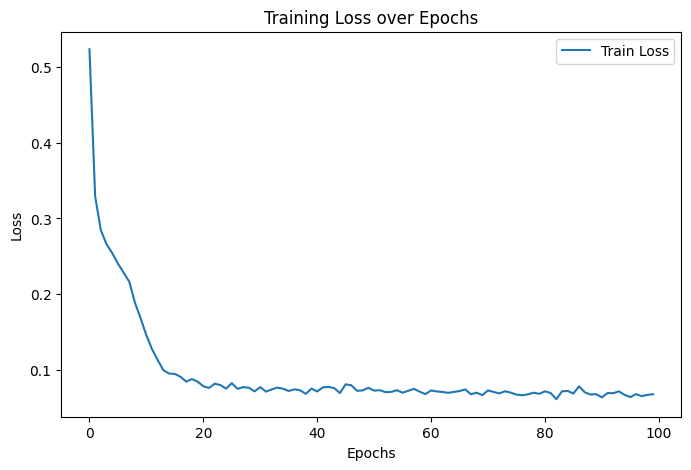

In [40]:
# 11. Plot Training Loss

plt.figure(figsize=(8, 5))  # Create a new figure with a size of 8 inches wide and 5 inches tall.
plt.plot(history.history['loss'], label='Train Loss')  # Plot the loss values recorded during training.
plt.xlabel("Epochs")  # Label the x-axis as "Epochs" (training cycles).
plt.ylabel("Loss")  # Label the y-axis as "Loss" (error between predicted and actual values).
plt.title("Training Loss over Epochs")  # Add a title to the plot.
plt.legend()  # Show legend (helps identify the line as 'Train Loss').
plt.show()  # Display the plot.

# history.history['loss']: Contains the loss value at each epoch from the training process.
# Plotting this helps us visually check how well the model is learning over time.
# Ideally, the loss should decrease steadily as epochs increase.



In [41]:
# 12. Evaluate Model

loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)  # Evaluate model performance on the test set.

print(acc)  # Print the test accuracy.
print(auc)  # Print the test AUC (Area Under the Curve).
print(loss)  # Print the test loss.

# model.evaluate(): Computes the loss and specified metrics (accuracy and AUC) on the test dataset.

# Parameters:
# X_test: Input features for evaluation.
# y_test: True labels corresponding to X_test.
# verbose=0: Suppresses output during evaluation (set to 1 for a progress bar).

# Returns:
# loss: The error between predicted and actual labels (as measured by binary_crossentropy).
# acc: Accuracy — how many predictions were correct.
# auc: Area Under the ROC Curve — how well the model distinguishes between classes.

# A good model will have:
# - Low loss
# - High accuracy (closer to 1)
# - High AUC (closer to 1)


0.9574999809265137
0.9908362030982971
0.11054838448762894


## Hyperparameters Affecting Results

1. **Number of Epochs**

   * How many times the model sees the entire training dataset during training.
   * More epochs can improve learning but might lead to overfitting if too high.

2. **Learning Rate**

   * Controls how much the model’s weights are updated during training.
   * A higher learning rate means bigger updates (faster learning but risk overshooting optimal values).
   * A lower learning rate means smaller updates (slower but more precise learning).

3. **Architecture of ANN**

   * Adding or removing layers changes the model's depth.
   * Changing the number of neurons in layers affects model capacity and complexity.
   * More layers/neurons can capture complex patterns but may lead to overfitting.

4. **Activation Function**

   * Determines how neurons activate and pass signals forward.
   * Common choices: ReLU, sigmoid, tanh.
   * Changing activation functions can affect model’s ability to learn non-linear relationships.

5. **Optimizers**

   * Algorithms used to update model weights during training.
   * Examples: SGD, Adam, RMSprop.
   * Different optimizers can impact speed and quality of learning.


